In [ ]:
import sys

!{sys.executable} -m pip install pycaret
!{sys.executable} -m pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.9 MB/s 
     |████████████████████████████████| 3.3 MB 60.7 MB/s 
     |████████████████████████████████| 88 kB 6.0 MB/s 
     |████████████████████████████████| 25.8 MB 1.4 MB/s 
     |████████████████████████████████| 5.0 MB 40.1 MB/s 
     |████████████████████████████████| 16.5 MB 45.6 MB/s 
     |████████████████████████████████| 167 kB 33.5 MB/s 
     |████████████████████████████████| 662 kB 57.8 MB/s 
     |████████████████████████████████| 2.0 MB 34.7 MB/s 
     |████████████████████████████████| 6.8 MB 19.5 MB/s 
     |████████████████████████████████| 325 kB 70.7 MB/s 
     |████████████████████████████████| 1.7 MB 61.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████

In [ ]:
!{sys.executable} -m pip install --force-reinstall numpy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.0-cp38-cp38-manylinux2010_x86_64.whl (15.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.0
    Uninstalling numpy-1.20.0:
      Successfully uninstalled numpy-1.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.8 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


In [1]:

import pandas as pd
import seaborn as sns
#import pycaret
import matplotlib.pyplot as plt
import numpy as np
#import catboost

In [2]:
data = pd.read_csv('full_migraine_data.csv')
data = data.drop(['date'],axis=1)

In [ ]:
data.migraine.value_counts()

0.0    1043
1.0     105
Name: migraine, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   StepCount                   1148 non-null   float64
 1   DistanceWalkingRunning      1148 non-null   float64
 2   AppleExerciseTime           1148 non-null   float64
 3   DistanceCycling             1148 non-null   float64
 4   DistanceDownhillSnowSports  1148 non-null   float64
 5   AppleStandHour              1148 non-null   float64
 6   SleepAnalysis               1148 non-null   float64
 7   period                      1148 non-null   float64
 8   migraine                    1148 non-null   float64
 9   drinks                      1148 non-null   int64  
 10  hangover                    1148 non-null   int64  
 11  var_weather                 1148 non-null   float64
 12  stress                      1148 non-null   float64
 13  pressure_variation          1148 

In [ ]:
data.columns

Index(['StepCount', 'DistanceWalkingRunning', 'AppleExerciseTime',
       'DistanceCycling', 'DistanceDownhillSnowSports', 'AppleStandHour',
       'SleepAnalysis', 'period', 'migraine', 'drinks', 'hangover',
       'var_weather', 'stress', 'pressure_variation', 'storm', 'full moon',
       'after_period', 'before_period', 'year_2020', 'year_2021', 'year_2022',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'wday_1',
       'wday_2', 'wday_3', 'wday_4', 'wday_5', 'wday_6'],
      dtype='object')

In [3]:
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (20,  10)


In [ ]:
mig_before_period = 0
mig_after_period = 0
mig_period = 0
for ind in data.index:
  if data.migraine[ind] == 1:
    if data['before_period'][ind] == 1:
       mig_before_period += 1
    elif data['after_period'][ind] == 1:
       mig_after_period += 1
    elif data['period'][ind] == 1:
       mig_period += 1

print('Migraines during periods:', mig_period)
print('Migraines before periods:', mig_before_period)
print('Migraines after periods:', mig_after_period)

Migraines during periods: 23
Migraines before periods: 4
Migraines after periods: 14


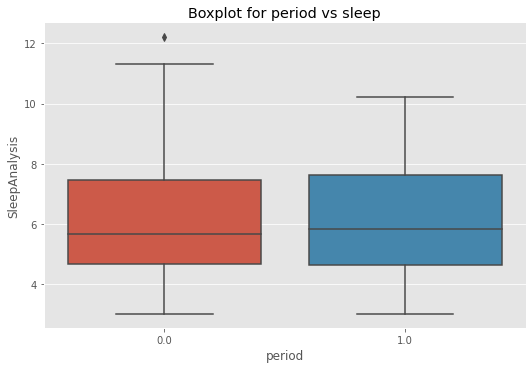

In [ ]:
sns.catplot(x="period", y="SleepAnalysis", data=data, kind="box", aspect=1.5)
plt.title("Boxplot for period vs sleep")
plt.show()

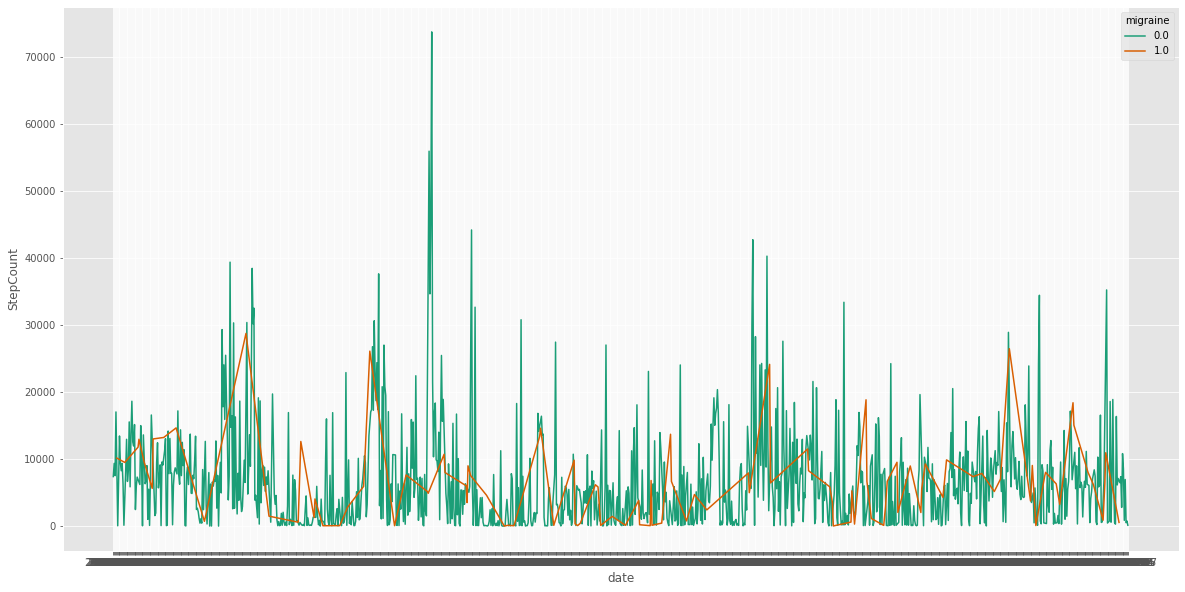

In [ ]:
sns.lineplot(x='date',y='StepCount',hue='migraine',data=data,palette="Dark2")
plt.show()

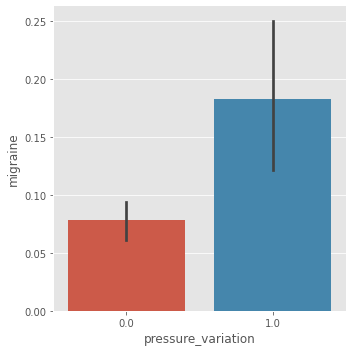

In [7]:
sns.catplot(data=data,x='pressure_variation',y = 'migraine',kind='bar')
plt.show()

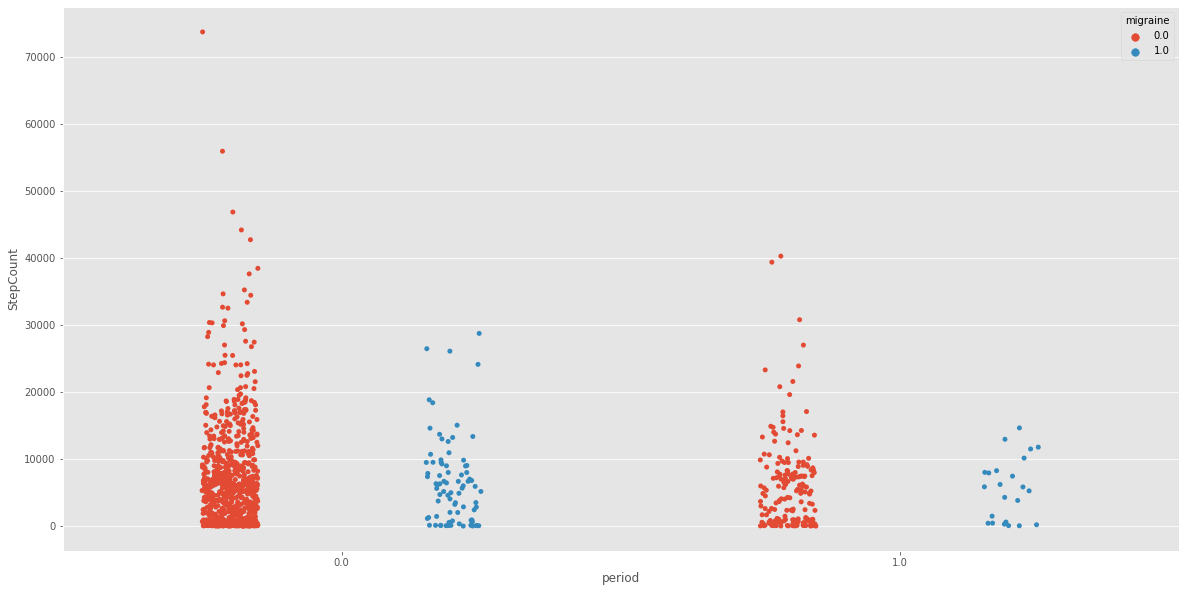

In [ ]:
sns.stripplot(x='period',y='StepCount',hue='migraine',data=data,dodge=True)
plt.show()

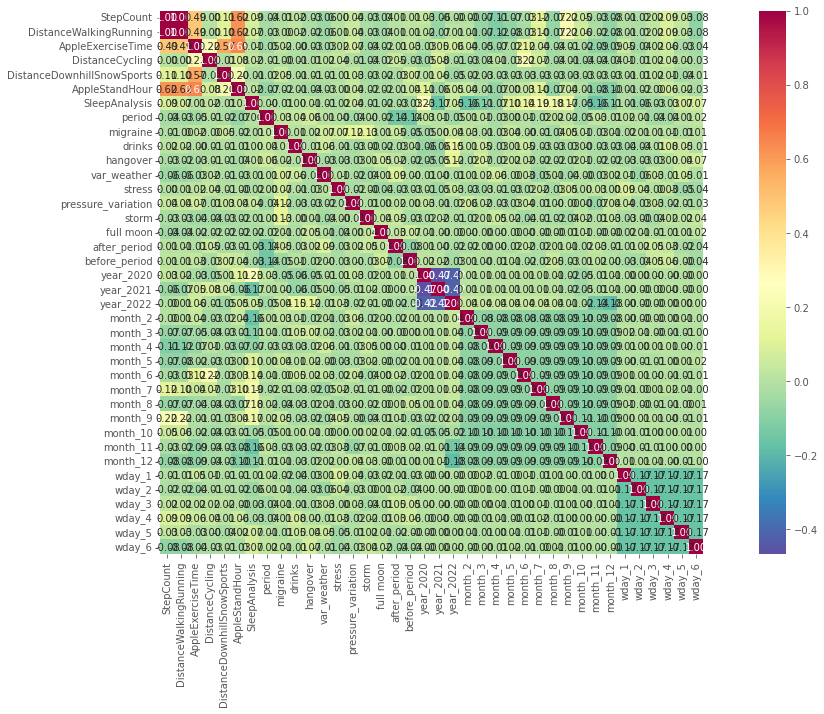

In [ ]:
corrmat = data.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=data.columns, 
                 xticklabels=data.columns, 
                 cmap="Spectral_r")
plt.show()

In [ ]:
from pycaret.classification import *
from imblearn.over_sampling import ADASYN
s = setup(data, target = 'migraine',numeric_features = ['StepCount', 'DistanceWalkingRunning', 'AppleExerciseTime',
       'DistanceCycling', 'DistanceDownhillSnowSports', 'AppleStandHour',
       'SleepAnalysis', 'period','storm','stress','pressure_variation',
       'drinks', 'hangover', 'var_weather','after_period', 'before_period','year_2020', 'year_2021', 'year_2022',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'wday_1',
       'wday_2', 'wday_3', 'wday_4', 'wday_5', 'wday_6',
       'full moon'],data_split_stratify=True,train_size=0.7,fix_imbalance=True,fix_imbalance_method = ADASYN(sampling_strategy=0.5),feature_interaction=True,feature_selection=True,log_experiment = True,session_id=3,experiment_name = 'migraine_pred')

,Description,Value
0,session_id,3
1,Target,migraine
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1148, 38)"
5,Missing Values,False
6,Numeric Features,37
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
2022/12/02 15:28:46 INFO mlflow.tracking.fluent: Experiment with name 'migraine_pred' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['StepCount',
                                                          'DistanceWalkingRunning',
                                                          'AppleExerciseTime',
                                                          'DistanceCycling',
                                                          'DistanceDownh

In [ ]:
# Now I will pretrain all the models 
compare_models( sort = 'F1',turbo = False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9278,0.6472,0.2196,0.8667,0.3379,0.3184,0.4071,9.693
rf,Random Forest Classifier,0.9228,0.6317,0.2196,0.7083,0.3239,0.2994,0.3610,0.296
gbc,Gradient Boosting Classifier,0.9241,0.6505,0.2071,0.8000,0.3183,0.2964,0.3768,0.358
nb,Naive Bayes,0.8966,0.6296,0.2750,0.4905,0.3048,0.2573,0.2883,0.032
lightgbm,Light Gradient Boosting Machine,0.9191,0.6631,0.2054,0.6500,0.2988,0.2723,0.3280,0.226
qda,Quadratic Discriminant Analysis,0.8729,0.6233,0.3179,0.4215,0.2932,0.2390,0.2727,0.037
et,Extra Trees Classifier,0.9091,0.6249,0.2196,0.5250,0.2926,0.2554,0.2888,0.260
lda,Linear Discriminant Analysis,0.8594,0.6551,0.3429,0.2615,0.2844,0.2105,0.2190,0.043
ridge,Ridge Classifier,0.8619,0.0000,0.3286,0.2608,0.2808,0.2077,0.2141,0.030
dt,Decision Tree Classifier,0.8656,0.6045,0.2857,0.2947,0.2751,0.2038,0.2108,0.039


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostClassifier object at 0x7f6bc824ea00>
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
gbc = create_model('gbc')
tuned_gbc = tune_model(gbc,n_iter=50,optimize='F1',choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9136,0.6695,0.3750,0.6000,0.4615,0.4173,0.4309
1,0.9136,0.6182,0.1250,1.0000,0.2222,0.2048,0.3377
2,0.9136,0.6387,0.1250,1.0000,0.2222,0.2048,0.3377
3,0.9250,0.5793,0.2857,0.6667,0.4000,0.3668,0.4046
4,0.9250,0.4481,0.1429,1.0000,0.2500,0.2332,0.3633
5,0.9125,0.4579,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9250,0.7280,0.1429,1.0000,0.2500,0.2332,0.3633
7,0.9500,0.8728,0.4286,1.0000,0.6000,0.5778,0.6374
8,0.9250,0.6399,0.2857,0.6667,0.4000,0.3668,0.4046


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.2, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=7,
                           min_weight_fraction_leaf=0.0, n_estimators=260,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
predict_model(tuned_gbc)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.2, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=7,
                           min_weight_fraction_leaf=0.0, n_estimators=260,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloadin

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.913,0.6648,0.0938,0.75,0.1667,0.1491,0.2454


,wday_6,DistanceWalkingRunning,month_5,var_weather,wday_5,full moon,wday_3,month_7,month_4,drinks,...,month_2_multiply_SleepAnalysis,year_2020_multiply_DistanceWalkingRunning,SleepAnalysis_multiply_year_2022,SleepAnalysis_multiply_year_2020,SleepAnalysis_multiply_storm,storm_multiply_DistanceWalkingRunning,SleepAnalysis_multiply_year_2021,migraine,Label,Score
0,1.0,0.521605,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,8.956944,0.000000,8.956944,0.521605,0.000000,0.0,0.0,0.9343
1,0.0,6.623542,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.000000,3.508241,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.9133
2,0.0,1.236850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,4.675741,0.000000,4.675741,1.236850,0.000000,0.0,0.0,0.8548
3,1.0,12.617138,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,12.617138,0.000000,8.813411,8.813411,12.617138,0.000000,0.0,0.0,0.7328
4,0.0,0.648501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.648501,0.000000,4.250067,0.000000,0.000000,0.000000,0.0,0.0,0.9501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,0.0,0.288160,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,5.663611,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.8406
341,0.0,1.125437,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.653056,0.0,0.0,0.8654
342,0.0,1.521102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.521102,0.000000,9.014198,0.000000,0.000000,0.000000,0.0,0.0,0.9237
343,0.0,0.194877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,7.696111,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.9248


In [ ]:
evaluate_model(tuned_gbc)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.2, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=7,
                           min_weight_fraction_leaf=0.0, n_estimators=260,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=3, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…